In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from bruges.attribute import glcm2d

In [3]:
data_seis = np.load(r'./docs/data/penobscot_filtered_sliced.npy')

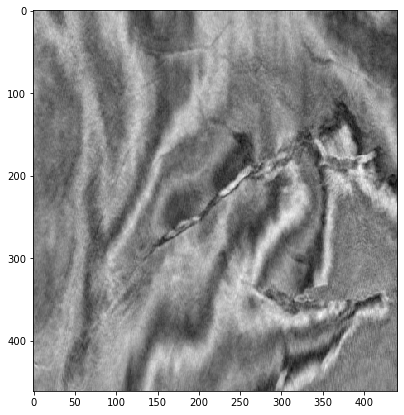

In [4]:
fig = plt.figure(figsize=(7,7))
plt.imshow(data_seis[:,:,8],cmap='gray',interpolation='none')
plt.show()

In [5]:
data = data_seis[:,:,8]

## Comparing different statistical method of calculating GLCM 
## (skimage GLCM, skimage+patchify, fast GLCM)

In [6]:
resultf3_1 = glcm2d(data, levels=16, kernel_size=8, distance=5.0, angle=0.0, feature='contrast', method='skimage')

GLCM statistic calculation: 100%|████████████████████████████████████████████| 197036/197036 [00:45<00:00, 4310.08it/s]


In [7]:
resultf3_2 = glcm2d(data, levels=16, kernel_size=8, distance=5.0, angle=0.0, feature='contrast', method='skimage_patchify')

GLCM statistic calculation: 100%|████████████████████████████████████████████| 197036/197036 [00:47<00:00, 4116.58it/s]


In [10]:
%%time
resultf3_3 = glcm2d(data, levels=16, kernel_size=8, distance=5.0, angle=0.0, feature='contrast', method='fast')

Wall time: 1.04 s


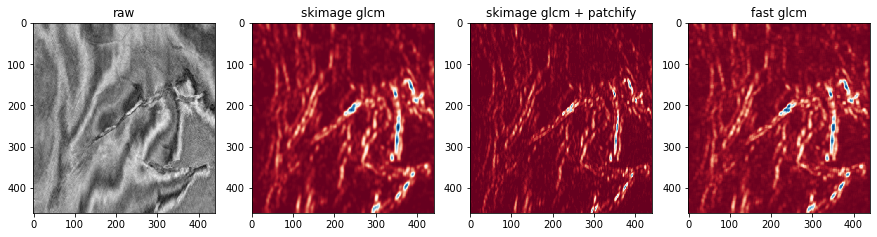

In [17]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
ax1.imshow(data,cmap='gray',interpolation='none')
ax2.imshow(resultf3_1,cmap='RdBu',interpolation='none')
ax3.imshow(resultf3_2,cmap='RdBu',interpolation='none')
ax4.imshow(resultf3_3,cmap='RdBu',interpolation='none')
ax1.set_title('raw')
ax2.set_title('skimage glcm')
ax3.set_title('skimage glcm + patchify')
ax4.set_title('fast glcm')
plt.show()

## Comparing different statistical features of GLCM

In [15]:
resultf3_contrast = glcm2d(data, levels=16, kernel_size=8, distance=5.0, angle=0.0, feature='contrast', method='fast')
resultf3_dissimilarity = glcm2d(data, levels=16, kernel_size=8, distance=5.0, angle=0.0, feature='dissimilarity', method='fast')
resultf3_homogeneity = glcm2d(data, levels=16, kernel_size=8, distance=5.0, angle=0.0, feature='homogeneity', method='fast')
resultf3_energy = glcm2d(data, levels=16, kernel_size=8, distance=5.0, angle=0.0, feature='energy', method='fast')

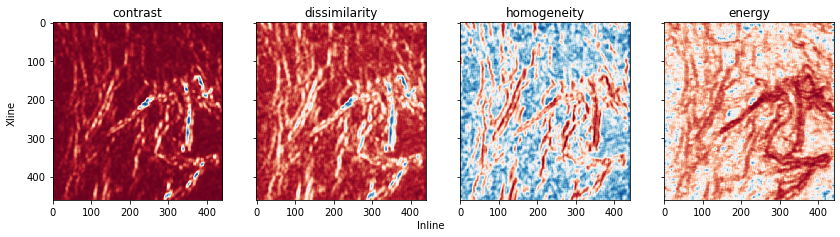

In [26]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(14,8),sharex=True, sharey=True)

ax1.imshow(resultf3_contrast,cmap='RdBu',interpolation='none')
ax2.imshow(resultf3_dissimilarity,cmap='RdBu',interpolation='none')
ax3.imshow(resultf3_homogeneity,cmap='RdBu',interpolation='none')
ax4.imshow(resultf3_energy,cmap='RdBu',interpolation='none')
ax1.set_title('contrast')
ax2.set_title('dissimilarity')
ax3.set_title('homogeneity')
ax4.set_title('energy')

f.text(0.5, 0.3, 'Inline', ha='center')
f.text(0.08, 0.5, 'Xline', va='center', rotation='vertical')
plt.show()